In [1]:
import tensorflow as tf

In [2]:
node1 = tf.constant(30)
node2 = tf.constant(30)
add_node = node1 + node2

In [3]:
session = tf.Session()

In [4]:
print(session.run(add_node))

60


In [5]:
node1 = tf.placeholder(tf.float32, [None, 2])
node2 = tf.placeholder(tf.float32, [None, 2])
add_node = node1 + node2
mul_node = node1 * node2

In [6]:
import numpy as np
x = [1,2]
y = [3,4]

In [7]:
x.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
type(mul_node)

In [ ]:
session

In [ ]:
session.run([add_node,mul_node], feed_dict={node1:x, node2:y})

In [ ]:
# Gradient descent

In [ ]:
# W*x + b -> linear regression

In [ ]:
W = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

In [ ]:
type(W)

In [ ]:
x = tf.placeholder(tf.float32, [None])
y = tf.placeholder(tf.float32, [None])

In [ ]:
model = W * x + b

In [ ]:
cost = tf.reduce_mean(tf.square(y-model))

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

In [ ]:
# training data
x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]

In [ ]:
train = optimizer.minimize(cost)

In [ ]:
session = tf.Session()
session.run(tf.global_variables_initializer())

In [ ]:
i_arr = []
W_arr = []
c_arr = []
for i in range(0,1000):
    if i%100:
        session.run(train, feed_dict={x: x_train, y: y_train})
        curr_W, curr_b, curr_loss = session.run([W, b, cost], {x: x_train, y: y_train})
        print("W: %s b: %s loss: %s" % (curr_W, curr_b, curr_loss))
        i_arr.append(i)
        W_arr.append(curr_W)
        c_arr.append(curr_loss)

In [ ]:
session.run(b)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.plot(i_arr, c_arr)

In [ ]:
#sigmoid function

In [ ]:
x_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5],
          [1, 7, 5, 5], [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0],
          [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

In [ ]:
x = tf.placeholder(tf.float32, [None,4])
y = tf.placeholder(tf.float32, [None,3])

In [ ]:
W = tf.Variable(tf.random_normal([4,3]), name="weight")
b = tf.Variable(tf.random_normal([3]), name="bias")

In [ ]:
h = tf.nn.softmax(tf.add(tf.matmul(x,W), b))

In [ ]:
cost = tf.reduce_mean(tf.square(y-h))

In [ ]:
session = tf.Session()

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

In [ ]:
optimizer = optimizer.minimize(cost)

In [ ]:
session.run(tf.global_variables_initializer())

In [ ]:
_, c = session.run([optimizer,cost], feed_dict={x:x_data, y:y_data})

In [ ]:
print(c)

In [ ]:
a = session.run(h, feed_dict={x:[[1,2,3,4]]})

In [ ]:
a.shape

In [ ]:
m = session.run(tf.arg_max(a, 1))

In [ ]:
print(a)

In [ ]:
print(m)

In [ ]:
# softmax, cross_entropy

In [ ]:
Y = tf.placeholder(tf.int32, shape=[None,3])
y_max = tf.argmax(Y,1)
Y_one_hot = tf.one_hot(y_max, 3)

In [ ]:
session.run(y_max, feed_dict={Y: y_data})

In [ ]:
Y_one_hot = tf.reshape(Y_one_hot, [-1, 3])

In [ ]:
logits = tf.matmul(x,W) + b
hypo = tf.nn.softmax(logits)

In [ ]:
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y_one_hot)

In [ ]:
session.run(Y_one_hot, feed_dict={Y: y_data})

In [ ]:
cost = tf.reduce_mean(cost_i)

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [ ]:
prediction = tf.argmax(hypo,1)

In [ ]:
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot,1))

In [ ]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [ ]:
session.run(tf.global_variables_initializer())
for i in range(3000):
    session.run(optimizer, feed_dict={x:x_data, Y: y_data})
    if i%200 == 0:
        print(W)
        print(b)
        c, acc = session.run([cost, accuracy], feed_dict={x:x_data, Y:y_data})    
        print(c)
        print(acc)

In [ ]:
pred = session.run(prediction, feed_dict={x: x_data})

In [ ]:
y = tf.argmax(Y,1)

In [ ]:
y = session.run(y, feed_dict={Y: y_data})

In [ ]:
for p,y in zip(pred, y):
    print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))

In [ ]:
# XOR

In [ ]:
import numpy as np

In [ ]:
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

In [ ]:
x = tf.placeholder(tf.float32, shape=[None, 2], name='x-input')
y = tf.placeholder(tf.float32, shape=[None, 1], name='y-input')

In [ ]:
with tf.name_scope("layer1") as scope:
    W1 = tf.Variable(tf.random_normal([2,2]),name='weight1')
    b1 = tf.Variable(tf.random_normal([2]),name='bias1')
    hidden = tf.nn.sigmoid(tf.matmul(x,W1) + b1)
    
    w1_hist = tf.summary.histogram("weights1", W1)
    b1_hist = tf.summary.histogram("bias1", b1)
    layer1_hist = tf.summary.histogram("layer1", hidden)
    
with tf.name_scope("layer2") as scope:
    W2 = tf.Variable(tf.random_normal([2,1]),name='weight2')
    b2 = tf.Variable(tf.random_normal([1]),name='bias2')
    h = tf.nn.sigmoid(tf.matmul(hidden, W2) + b2)
    
    w2_hist = tf.summary.histogram("weights2", W2)
    b2_hist = tf.summary.histogram("bias2", b2)
    h_hist = tf.summary.histogram("hyp", h)

In [ ]:
with tf.name_scope("cost") as scope:
    cost = -tf.reduce_mean(y * tf.log(h) + (1 - y) * tf.log(1 - h))
    cost_summ = tf.summary.scalar("cost", cost)

In [ ]:
with tf.name_scope("train") as scope:
    train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [ ]:
prediction = tf.cast(h > 0.3, dtype=tf.float32)

In [ ]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y), dtype=tf.float32), axis=0)
accuracy_summ = tf.summary.scalar("accuracy", accuracy)

In [ ]:
with tf.Session() as session:
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter("./logs/xor_logs_r0_01")
    writer.add_graph(session.graph)  # Show the graph
    session.run(tf.global_variables_initializer())
    
    for i in range(10001):
        session.run(train, feed_dict={x: x_data, y: y_data})
#         summary = session.run(merged_summary, feed_dict={x: x_data, y: y_data})
#         writer.add_summary(summary, global_step=i)
        a, c = session.run([accuracy,cost], feed_dict={x: x_data, y: y_data})
        if i%2000 == 0:
            print("Cost: ", c, "accuracy: ", a)
        

In [ ]:
# CNN

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [4]:
tf.argmax(mnist.test.labels, 1)

<tf.Tensor 'ArgMax:0' shape=(10000,) dtype=int64>

In [7]:
image = mnist.train.images[0].reshape(28,28)
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
mnist.test.images.shape

(10000, 784)

In [9]:
mnist.test.labels.shape

(10000, 10)

In [13]:
tf.argmax([1,2,3], 1)

<tf.Tensor 'ArgMax_4:0' shape=() dtype=int64>

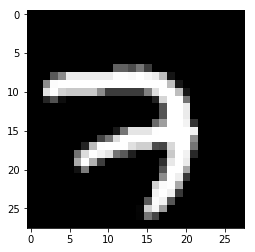

In [5]:
plt.imshow(image, cmap='gray')

In [5]:
class Model:
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()
        
    def _build_net(self):

        self.training = tf.placeholder(tf.bool)
        self.X = tf.placeholder(tf.float32, [None, 784])

        X_img = tf.reshape(self.X, [-1,28,28,1])
        self.Y = tf.placeholder(tf.float32, [None, 10])

        conv1 = tf.layers.conv2d(X_img, filters=32, kernel_size=[3,3], padding="SAME", activation=tf.nn.relu)
        pool1 = tf.layers.max_pooling2d(conv1, pool_size=[2,2], padding="SAME", strides=2)

        dropout1 = tf.layers.dropout(inputs=pool1, rate=0.7, training=self.training)
        print(dropout1.shape)
#         # Convolutional Layer #2 and Pooling Layer #2
#         conv2 = tf.layers.conv2d(inputs=dropout1, filters=64, kernel_size=[3, 3],
#                                  padding="SAME", activation=tf.nn.relu)
#         pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2],
#                                         padding="SAME", strides=2)
#         dropout2 = tf.layers.dropout(inputs=pool2,
#                                      rate=0.7, training=self.training)
        
#         # Convolutional Layer #2 and Pooling Layer #2
#         conv3 = tf.layers.conv2d(inputs=dropout2, filters=128, kernel_size=[3, 3],
#                                  padding="same", activation=tf.nn.relu)
#         pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2],
#                                         padding="same", strides=2)
#         dropout3 = tf.layers.dropout(inputs=pool3,
#                                      rate=0.7, training=self.training)
        
        # Dense Layer with Relu
        flat = tf.reshape(dropout1, [-1, 14*14*32])
        dense4 = tf.layers.dense(inputs=flat,
                                 units=625, activation=tf.nn.relu)
        dropout4 = tf.layers.dropout(inputs=dense4,
                                     rate=0.5, training=self.training)
        self.logits = tf.layers.dense(inputs=dropout4, units=10)


        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(self.cost)
        
        correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        
    def predict(self, x_test, training=False):
        return self.sess.run(self.logits, feed_dict={self.X: x_test, self.training: training})
    def get_accuracy(self, x_test, y_test, training=False):
        return self.sess.run(self.accuracy,
                             feed_dict={self.X: x_test,
                                        self.Y: y_test, self.training: training})

    def train(self, x_data, y_data, training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data, self.training: training})

In [14]:
sess = tf.Session()
m1 = Model(sess, "m1")

sess.run(tf.global_variables_initializer())

print('Learning Started!')

# train my model
# for epoch in range(training_epochs):
#     avg_cost = 0
#     total_batch = int(mnist.train.num_examples / batch_size)

for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    c, _ = m1.train(batch_xs, batch_ys)
    avg_cost += c / total_batch

#     print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
print('Accuracy:', m1.get_accuracy(mnist.test.images, mnist.test.labels))

(?, 14, 14, 32)
Learning Started!
Learning Finished!
Accuracy: 0.9734


In [13]:
mnist.train.num_examples/batch_size

550.0